<a href="https://colab.research.google.com/github/FukasakuRino/chss_2025_assignment/blob/rino/income_predicion_fukasaku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 小地域の収入推定

```Data```フォルダには、小地域の収入データ(```income_district.csv```)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。


- データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい
- データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい
- モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい


# 推定方法
ランダムフォレストによる予測を行う。

理由：

・教師あり学習によって回帰を行えるため

・多数の特徴量が存在するため

・過学習を防ぐため


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR

# Path to your TTF file
ttf_path = '/content/NotoSansJP-VariableFont_wght.ttf'
# Register the font
font_manager.fontManager.addfont(ttf_path)
custom_font = font_manager.FontProperties(fname=ttf_path)

# Set the custom font as default
plt.rcParams['font.family'] = custom_font.get_name()
plt.rcParams['font.family'] = 'Noto Sans JP'

In [116]:
#各データの読み込み
df_age = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/h27_age_df.csv')
df_family = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/h27_family_df.csv')
df_gender = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/h27_gender_df2.csv')
df_house_info = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/h27_house_info_df.csv')
df_house = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/h27_house_df.csv')
df_industry = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/h27_indusry_df.csv')
df_job = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/h27_job_df.csv')
df_labor = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/h27_labor_df.csv')
df_marriage = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/h27_marriage_df.csv')
df_work_status = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/h27_work_status_df.csv')
df_income = pd.read_csv('https://raw.githubusercontent.com/lvzeyu/chss_2025_assignment/refs/heads/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C/Data/income_district.csv')

In [117]:
#代表地区のみとしたデータ
df_age_general = df_age[df_age["district2_id"].isna()]
df_family_general = df_family[df_family["district2_id"].isna()]
df_gender_general = df_gender[df_gender["district2_id"].isna()]
df_house_general = df_house[df_house["district2_id"].isna()]
df_house_info_general = df_house_info[df_house_info["district2_id"].isna()]
df_industry_general = df_industry[df_industry["district2_id"].isna()]
df_job_general = df_job[df_job["district2_id"].isna()]
df_labor_general = df_labor[df_labor["district2_id"].isna()]
df_marriage_general = df_marriage[df_marriage["district2_id"].isna()]
df_work_status_general = df_work_status[df_work_status["district2_id"].isna()]
#上記のデータと収入データを統合
df_merge_age = pd.merge(df_age_general, df_income, left_on="district_id", right_on="area_code")
df_merge_family = pd.merge(df_family_general, df_income, left_on="district_id", right_on="area_code")
df_merge_gender = pd.merge(df_gender_general, df_income, left_on="district_id", right_on="area_code")
df_merge_house = pd.merge(df_house_general, df_income, left_on="district_id", right_on="area_code")
df_merge_house_info = pd.merge(df_house_info_general, df_income, left_on="district_id", right_on="area_code")
df_merge_industry = pd.merge(df_industry_general, df_income, left_on="district_id", right_on="area_code")
df_merge_job = pd.merge(df_job_general, df_income, left_on="district_id", right_on="area_code")
df_merge_labor = pd.merge(df_labor_general, df_income, left_on="district_id", right_on="area_code")
df_merge_marriage = pd.merge(df_marriage_general, df_income, left_on="district_id", right_on="area_code")
df_merge_work_status = pd.merge(df_work_status_general, df_income, left_on="district_id", right_on="area_code")

# 1. データの前処理
国勢調査における小地域集計データをすべて統合する

1. データの前処理として，分析に必要な列のみを抽出したデータを作成

なお，年齢データで性別ごとの計測データが存在するため，性別データは使用しないこととする．

2. 1.によって整理されたデータを統合

In [118]:
# df_age_general: 性別年齢ごとの計測データ
age_cols_general = ['district_id'] + [col for col in df_age_general.columns if ('male' in col or 'female' in col) ]
df_age_selected = df_age_general[age_cols_general]

# df_family_general: 家族人数ごとの計測データ
family_cols_general = ['district_id'] + [col for col in df_family_general.columns if 'member_' in col]
df_family_selected = df_family_general[family_cols_general]

# df_house_general: 住所形態ごとの計測データ
house_cols_general = ['district_id', 'family_house',
       'own_house_family', 'public_rent_family', 'private_rent_family',
       'salary_rent_family', 'room_rent_family', 'other_house_family',
       'own_house_individual', 'public_rent_individual',
       'private_rent_individual', 'salary_rent_individual',
       'room_rent_individual', 'other_house_individual']
df_house_selected = df_house_general[house_cols_general]

# df_house_info_general: 詳細な住所形態ごとの計測データ
house_info_cols_general = ['district_id', 'single_house_family',
       'long_house_family', 'share_house_family', '1-2floor_family',
       '3-5floor_family', '6-10floor_family', '11floor_family',
       'single_house_individual', 'long_house_individual',
       'share_house_individual', '1-2floor_individual', '3-5floor_individual',
       '6-10floor_individual', '11floor_individual']
df_house_info_selected = df_house_info_general[house_info_cols_general]

# df_industry_general: 業種ごとの計測データ
industry_cols_general = ['district_id'] + [col for col in df_industry_general.columns if col not in ['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name', 'Unnamed: 0']]
df_industry_selected = df_industry_general[industry_cols_general]

# df_job_general: 職種ごとの計測データ
job_cols_general = ['district_id'] + [col for col in df_job_general.columns if col not in ['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name', 'Unnamed: 0']]
df_job_selected = df_job_general[job_cols_general]

# df_labor_general: 労働有無ごとの計測データ
labor_cols_general = ['district_id', 'labor_male', 'no_labor_male', 'labor_female', 'no_labor_female']
df_labor_selected = df_labor_general[labor_cols_general]

# df_marriage_general: 婚姻状態有無ごとの計測データ
marriage_cols_general = ['district_id', 'unmarried_male', 'married_male', 'divorced_male', 'unmarried_female', 'married_female', 'divorced_female']
df_marriage_selected = df_marriage_general[marriage_cols_general]

# df_work_status_general: 雇用形態ごとの計測データ
work_status_cols_general = ['district_id', 'employer_male',
       'self_employed_male', 'family_work_male', 'unkonwn_status_male',
       'employer_female', 'self_employed_female', 'family_work_female',
       'unkonwn_status_female']
df_work_status_selected = df_work_status_general[work_status_cols_general]


# district_idを共通のインデックスとしてデータを統合
df_merge = pd.merge(df_age_selected, df_family_selected, on='district_id', how='inner')
df_merge = pd.merge(df_merge, df_house_selected, on='district_id', how='inner')
df_merge = pd.merge(df_merge, df_house_info_selected, on='district_id', how='inner')
df_merge = pd.merge(df_merge, df_industry_selected, on='district_id', how='inner')
df_merge = pd.merge(df_merge, df_job_selected, on='district_id', how='inner')
df_merge = pd.merge(df_merge, df_labor_selected, on='district_id', how='inner')
df_merge = pd.merge(df_merge, df_marriage_selected, on='district_id', how='inner')
df_merge = pd.merge(df_merge, df_work_status_selected, on='district_id', how='inner')


# df_mergeとdf_incomeを統合
df_merge = pd.merge(df_merge, df_income, left_on='district_id', right_on='area_code', how='inner')

# area_codeとdistrict_idが重複しているため，area_codeを削除
df_merge = df_merge.drop(columns=['area_code'])


df_merge

,district_id,0-4_male,5-9_male,10-14_male,15-19_male,20_24_male,25-29_male,30-34_male,35-39_male,40-44_male,...,divorced_female,employer_male,self_employed_male,family_work_male,unkonwn_status_male,employer_female,self_employed_female,family_work_female,unkonwn_status_female,income_mean
0,45201,9147,9664,9776,10275,8537,8787,10391,12581,13964,...,38679,80219,13952,1541,2791,76534,3968,6097,2127,410.041038
1,45202,3758,4008,4089,3985,3219,3710,4401,4839,4944,...,19289,32431,7187,795,514,30615,1731,3380,379,347.089094
2,45203,2613,2886,3051,3112,2383,2581,3080,3498,3871,...,16045,24474,4670,429,475,22419,1491,1723,316,363.127201
3,45204,968,1145,1107,1200,965,932,1224,1404,1444,...,7379,10444,2075,289,88,9339,610,1039,74,361.800658
4,45205,978,1017,1072,997,615,834,1100,1196,1216,...,6075,8073,3119,407,176,8309,725,1798,134,345.428894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,8442,288,299,349,353,376,402,537,573,651,...,1545,4122,561,55,17,2729,126,194,17,470.108696
1234,8443,953,1071,1093,1177,1210,1242,1421,1639,1960,...,3964,11388,1453,162,352,8812,424,501,205,445.899321
1235,8521,393,481,600,551,637,724,701,774,770,...,1927,5147,1300,393,144,3637,190,878,97,526.232114
1236,8546,479,487,629,597,562,577,722,847,971,...,2206,5619,1268,265,249,4451,222,797,143,478.836317


In [119]:
#df_merge 上の"-", "X" を欠損値処理し，平均値で補完する
cols_to_convert = df_merge.columns.drop(['district_id', 'income_mean'])
df_merge[cols_to_convert] = df_merge[cols_to_convert].replace(['-', 'X'], np.nan)
df_merge[cols_to_convert] = df_merge[cols_to_convert].astype(float)

for col in cols_to_convert:
    if df_merge[col].isnull().any():
        df_merge[col] = df_merge[col].fillna(df_merge[col].mean())

In [120]:
df_merge.shape

(1238, 163)

# データ分割

訓練データとテストデータに分割

In [121]:
#特徴量のみのデータとするため，district_id と income_mean を削除する
train_data = df_merge.drop(["income_mean", "district_id"], axis=1) # Dropping both columns
X = train_data.values
y = df_merge["income_mean"].values

#データ分割（30%をテストデータとする）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#district_id　と income_mean を削除
cols_to_convert = df_merge.columns.drop(['district_id', 'income_mean'])

X_train_df = pd.DataFrame(X_train, columns=df_merge.drop(["income_mean", "district_id"], axis=1).columns)

X_train_df[cols_to_convert.drop('district_id', errors='ignore')] = X_train_df[cols_to_convert.drop('district_id', errors='ignore')].replace(['-', 'X'], np.nan)


X_train_df[cols_to_convert.drop('district_id', errors='ignore')] = X_train_df[cols_to_convert.drop('district_id', errors='ignore')].astype(float)

# 欠損値処理をした値を平均値で補完
for col in X_train_df.columns:
    if X_train_df[col].isnull().any():
        X_train_df[col] = X_train_df[col].fillna(X_train_df[col].mean())


X_train_processed = X_train_df.values

# ランダムフォレストの実装


---

**使用するデータの構造**



*   説明変数

小地域集計データを統合したdf_mergeを使用。
*   目的変数

小地域の収入データであるdf_incomeを使用。

---

**ランダムフォレストの実装**




*   https://zenn.dev/0w0kaomoji/articles/7a1218c23ba357 を参考にランダムフォレストを実装

*   説明変数の重要度をグラフで図示

*   テストデータの精度を出力

*   計測値を予測値をそれぞれグラフに図示

*   訓練データとテストデータ平均二乗誤差と決定係数を出力し，の残差をプロット






In [122]:
#ランダムフォレストモデルの設定
forest = RFR(criterion= 'squared_error', #不純度基準
             random_state=1,             #乱数シード
             n_jobs=-1)                  #並列処理


forest.fit(X_train_processed, y_train) #モデルの学習

#予測値の取得
y_train_pred = forest.predict(X_train_processed)
y_test_pred = forest.predict(X_test)

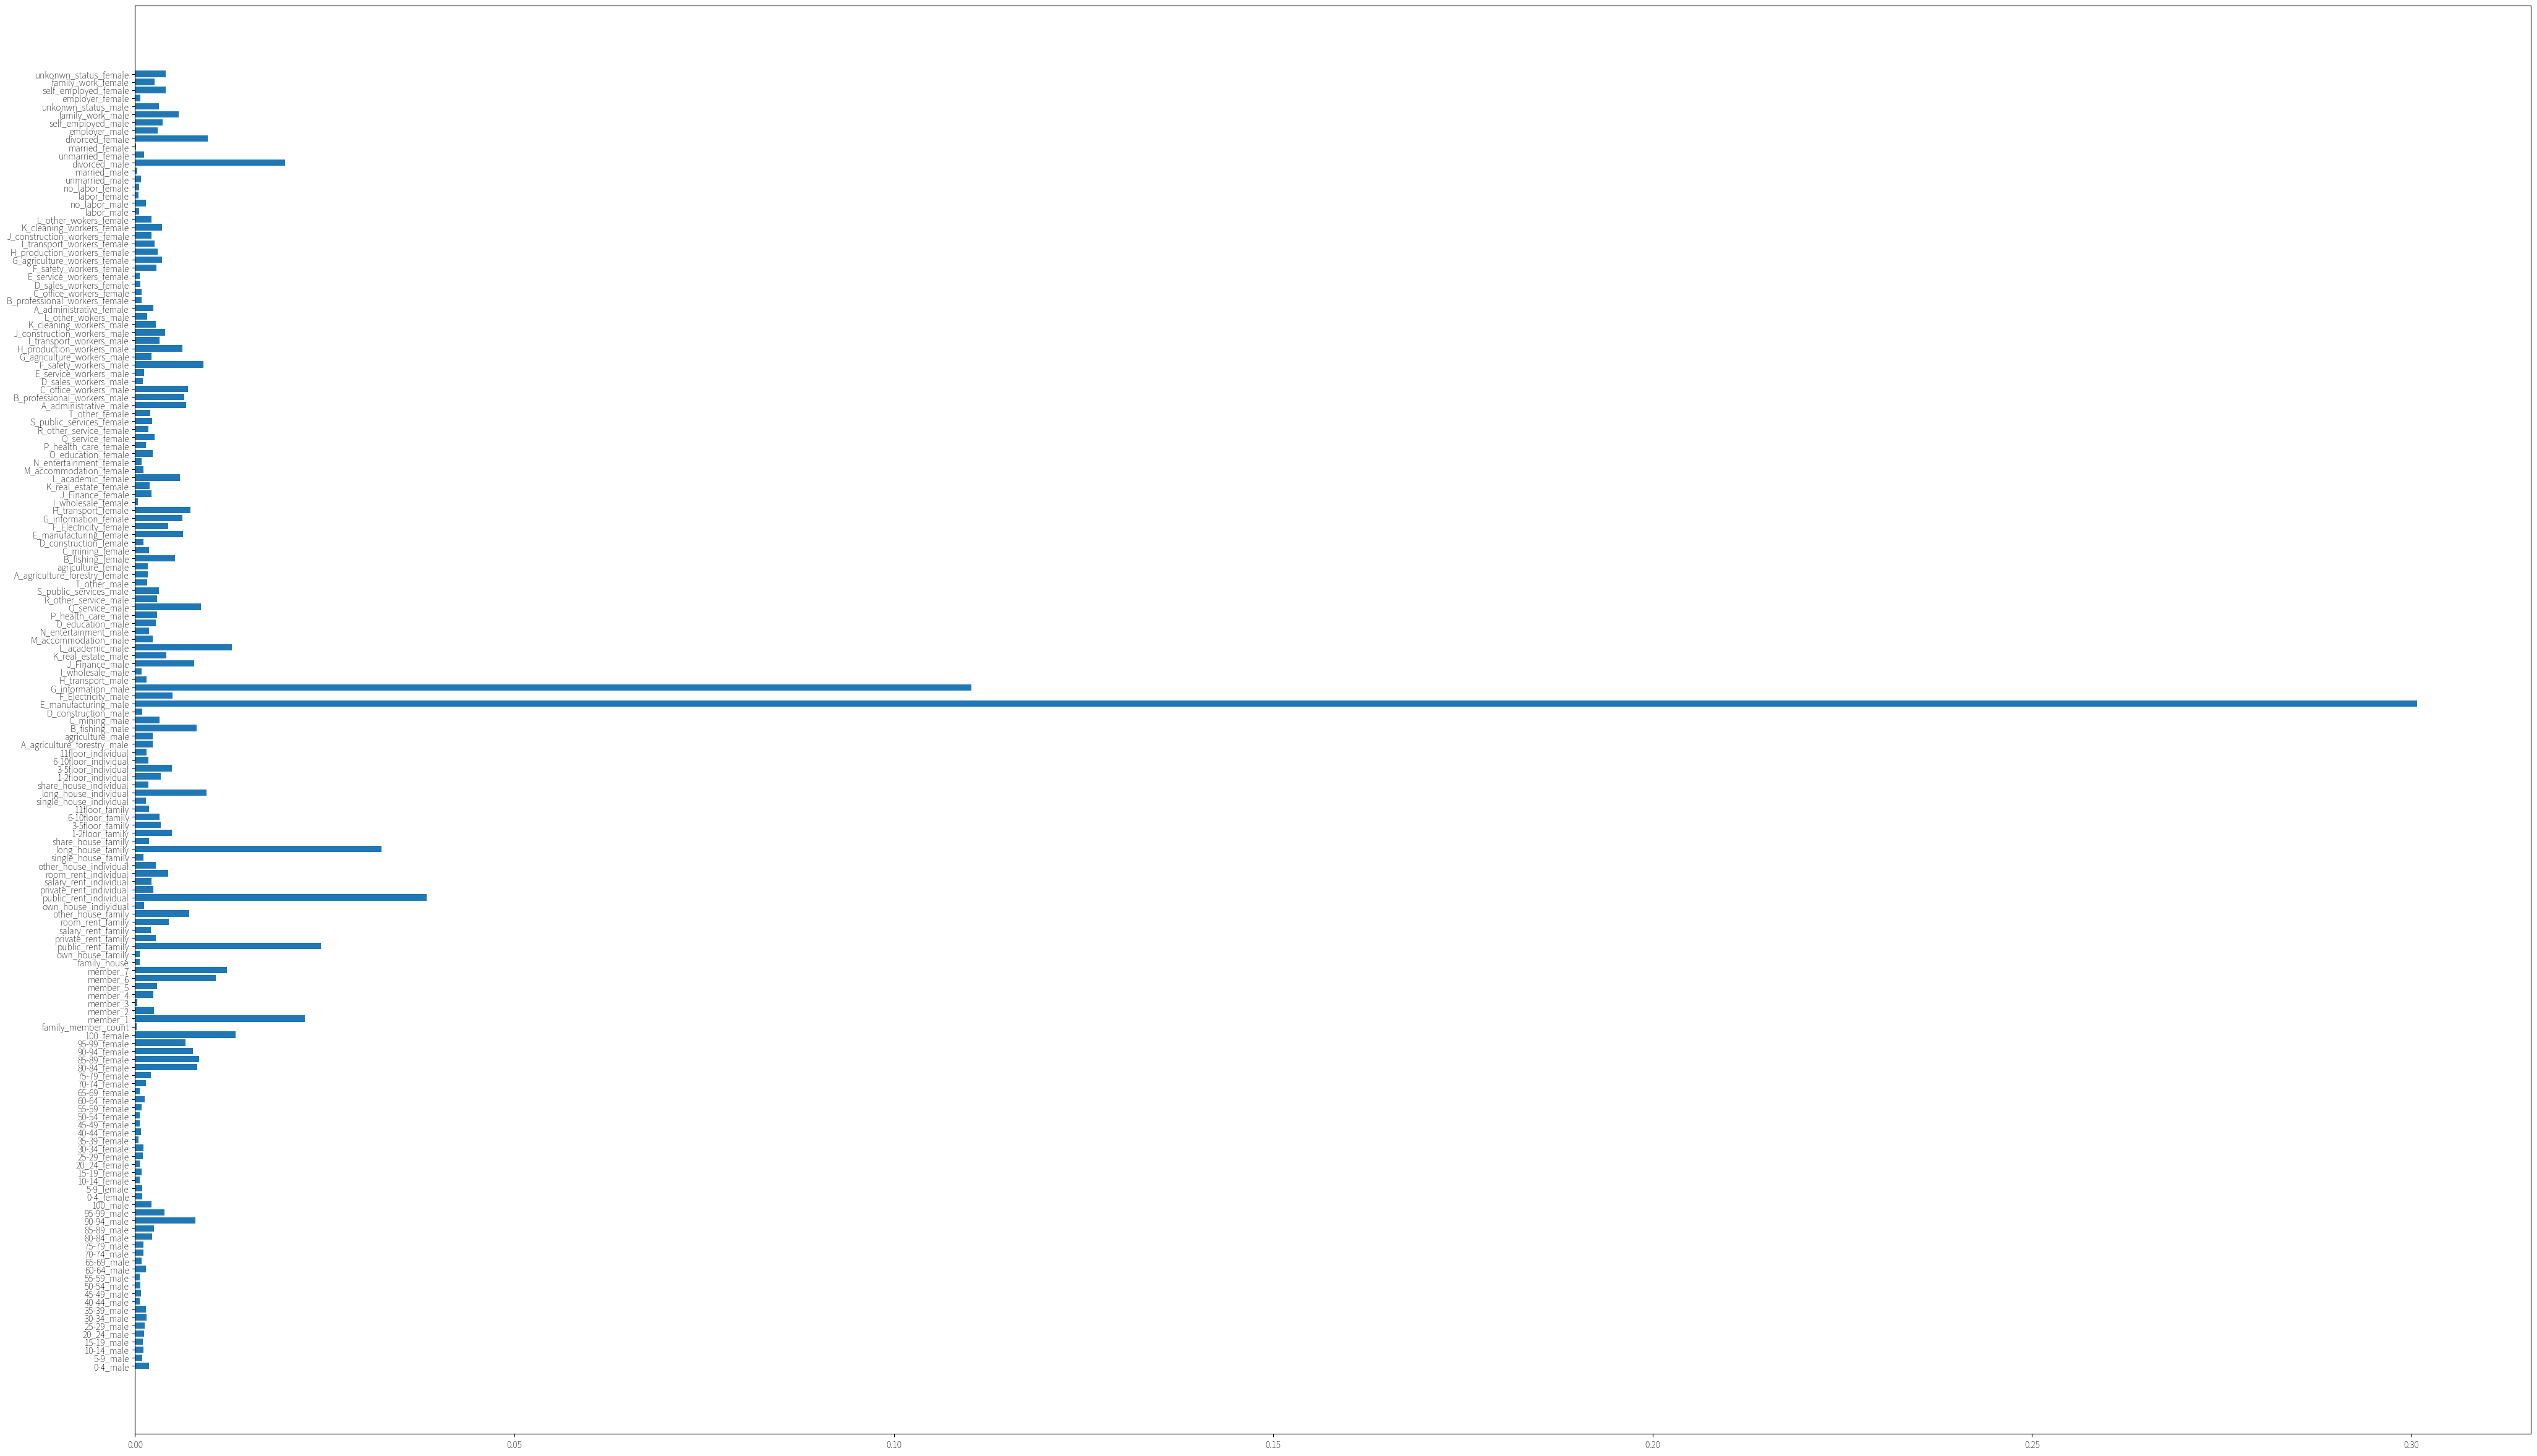

In [133]:
labels = X_train_df.columns
importances = forest.feature_importances_

plt.figure(figsize = (50,30))
plt.barh(y = range(len(importances)), width = importances)
plt.yticks(ticks = range(len(labels)), labels = labels)
plt.show()

*   値が大きい順に E_manufacturing_male, G_information_male, public_rent_individual, long_house_family, public_rent_family となっている．

*   上記の結果から，推定における重要度は男性の業種が最も高いということが分かる．

In [124]:
print("score=", forest.score(X_test, y_test))

score= 0.6200581599196087


*   上記の結果から，精度は約0.620であることが分かる．

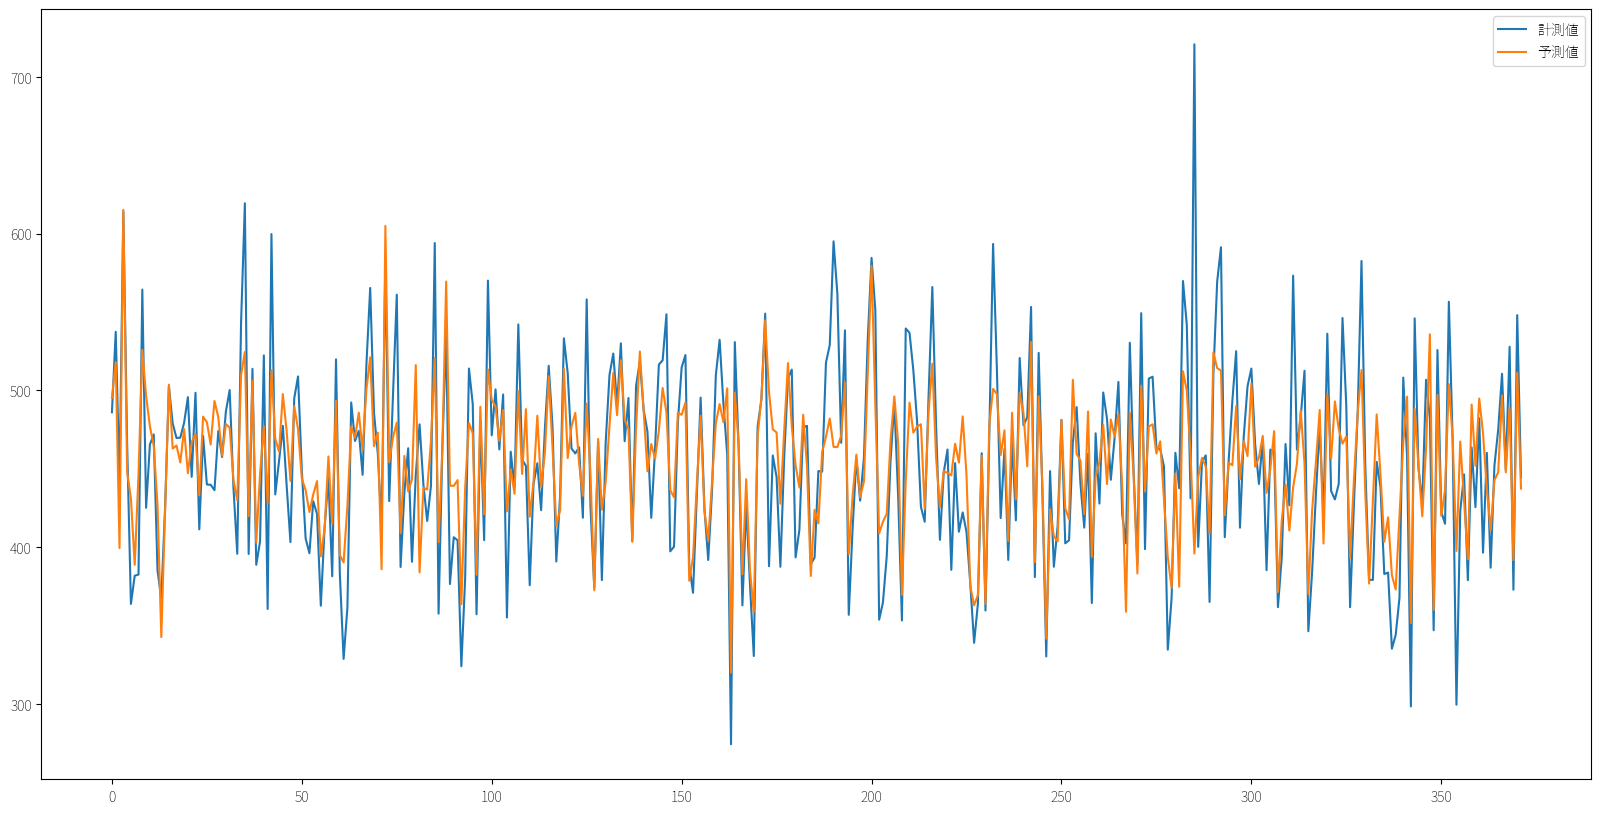

In [134]:
%matplotlib inline

plt.figure(figsize=(20,10))
plt.plot(y_test, label='計測値') # Removed .values
plt.plot(y_test_pred, label="予測値") # Removed .values
plt.legend()
plt.show()

平均二乗誤差 訓練データ: 167.824, テストデータ: 1524.160
決定係数 訓練データ: 0.958, テストデータ: 0.620


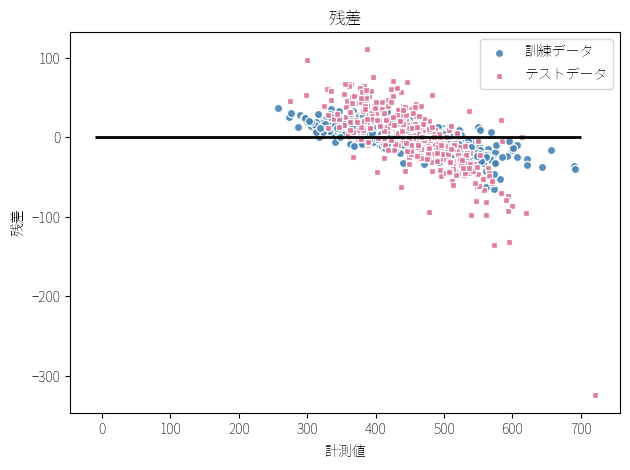

In [136]:
# 平均二乗誤差と決定係数の表示
print("平均二乗誤差 訓練データ: %.3f, テストデータ: %.3f" % (
    mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print("決定係数 訓練データ: %.3f, テストデータ: %.3f" % (
    r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

plt.scatter(y_train, y_train_pred - y_train,
            c= "steelblue", edgecolor="white", marker="o",
            s=35, alpha=0.9, label='訓練データ')
plt.scatter(y_test, y_test_pred - y_test,
            c="palevioletred", edgecolor="white", marker="s",
            s=14, alpha=0.9, label='テストデータ')
plt.xlabel("計測値")
plt.ylabel('残差')
plt.legend(loc='upper right')
plt.title('残差')
plt.hlines(y=0, xmin=-10, xmax=700, lw=2, color='black')
plt.tight_layout()
plt.show()

# 結果・反省点

---

**結果**
*   出力結果から，ある程度精確な推定を行うことができた。

*   特徴量の重要度から，男性の業種と住居形態が収入と関連が高いということが分かった．

---

**反省点**
*   データの扱いに手間取ってしまい，時間がかかってしまった．

*   精度が約0.62とあまり高くなくなってしまった．決定係数をみたところ，訓練データでは0.958と高い値であるため，過学習の可能性が考えられる．


# 参考にしたWebサイト

*   ランダムフォレストの獲得跳梁の重要度をfeature_importanceから可視化してみた（投稿者：haruki_yasui, 更新日：2022-07-17）
https://qiita.com/haruki_yasui/items/a83428361fce6b6fbb42

*   ランダムフォレスト回帰【機械学習】（投稿者：0w0_kaomoji，更新日：2024-11-15）
https://zenn.dev/0w0kaomoji/articles/7a1218c23ba357


*   【Python】 ランダムフォレストを実装してみる（投稿者：yuya2220，更新日：2025-01-07）
https://qiita.com/yuya2220/items/c45ac382754d909d302e

*   【機械学習】 ランダムフォレストを理解する（投稿者：Hawaii(Hawaii)，更新日：2020-11-12）
https://qiita.com/Hawaii/items/5831e667723b66b46fba

*   今さら聞けないPython - scikit-learnを用いた機械学習（投稿者：taka_yayoi(Takaaki Yayoi)，更新日：2023-04-09）
https://qiita.com/taka_yayoi/items/08d3166714b53b9acc7b#%E6%84%9F%E6%9F%93%E8%80%85%E6%95%B0%E3%81%A8%E6%AD%BB%E8%80%85%E6%95%B0%E3%81%AE%E9%96%A2%E4%BF%82
